In [2]:
import requests
import lxml.html

url = 'http://www.naver.com'
rs = requests.get(url)

tree = lxml.html.fromstring(rs.text)
for a in tree.cssselect('a[href^="http://"]'): # a태그에서 href가 'http://'로 시작하는 것을 가져오는 것
    print(a.get("href"),a.text)

http://update.whale.naver.net/downloads/installers/WhaleSetup.exe None
http://help.naver.com/support/alias/contents2/naverhome/naverhome_1.naver 네이버를 시작페이지로
http://jr.naver.com None
http://happybean.naver.com/main/SectionMain.nhn None
http://search.naver.com/search.naver?where=nexearch&query=%ED%95%84%EB%A6%AC%ED%95%80+%ED%99%94%EC%82%B0&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8 

http://search.naver.com/search.naver?where=nexearch&query=%ED%95%9C%EA%B0%80%EB%B9%88&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8 

http://search.naver.com/search.naver?where=nexearch&query=%ED%99%8D%EC%8A%B9%EB%B2%94&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8 

http://search.naver.com/search.naver?where=nexearch&query=%ED%95%B2%EA%B8%B0&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8 

http://search.naver.com/search.naver?where=nexearch&query=%EA%B9%80%EC%95%BC%EB%8B%88&sm=top_lve.agallgrpmamsi0en0sp0&x_nxpr-front=all01-2&ie=utf8 

http://sea

# BeautifulSoup

In [3]:
from bs4 import BeautifulSoup
page = open('c:/data/03. test_first.html', 'r').read()
soup = BeautifulSoup(page, 'html.parser')

In [4]:
print(soup)

<!DOCTYPE html>

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>


그냥 print()와 다르게 공백을 정리된 상태로 출력된다

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>


### 하위 tag에 접근하기 - 1

In [9]:
soup.children
# list

In [12]:
# 제일 바깥에 있던 <!DOCTYPE html>태그를 제외한 나머지 태그들이 출력
list1 = list(soup.children)
list1

['html', '\n', <html>
 <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>
 <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>
 </html>]

In [15]:
list1[0]

'html'

In [16]:
list1[1]

'\n'

In [17]:
list1[2]

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

### 하위 tag에 접근하기 - 2

In [21]:
# list1의 가장 바깥 태그를 버리고 그 하위 태그들을 가져온다
list2 = list(list1[2].children)
list2

['\n', <head>
 <title>Very Simple HTML Code by PinkWink</title>
 </head>, '\n', <body>
 <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>
 </body>, '\n']

In [23]:
for n in range(len(list2)):
    print(n, ':')
    print(list2[n])
    print('---')

0 :


---
1 :
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
---
2 :


---
3 :
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
---
4 :


---


### 하위 tag에 접근하기 - 3 

In [25]:
head = list2[1]
head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

In [29]:
list3 = list(head.children)
print(list3)

['\n', <title>Very Simple HTML Code by PinkWink</title>, '\n']


In [30]:
print(list3[1])

<title>Very Simple HTML Code by PinkWink</title>


In [32]:
list4 = list(list3[1].children)
print(list4)

['Very Simple HTML Code by PinkWink']


In [34]:
list4[0]

'Very Simple HTML Code by PinkWink'

In [35]:
soup.html

<html>
<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>
</html>

In [36]:
soup.head

<head>
<title>Very Simple HTML Code by PinkWink</title>
</head>

In [37]:
soup.title

<title>Very Simple HTML Code by PinkWink</title>

In [38]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

In [42]:
html = list(soup.children)[2]
body = list(html.children)[3]
list(body.children)

['\n', <div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>, '\n', <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, '\n', <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>, '\n']

In [43]:
soup.body

<body>
<div>
<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>
<p class="inner-text second-item">
                Happy Data Science.
                <a href="https://www.python.org" id="py-link">Python</a>
</p>
</div>
<p class="outer-text first-item" id="second">
<b>
                Data Science is funny.
            </b>
</p>
<p class="outer-text">
<b>
                All I need is Love.
            </b>
</p>
</body>

### tag 찾기 기본
- soup.find('tag명') : <tag명>을 찾아냄 ( 처음으로 나온 것만 반환 )
- soup,find_all('tag명') : <tag명>을 전부 찾아냄

In [44]:
soup.find('p')

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

In [49]:
soup.find_all('p')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>, <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>, <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

### 속성 지정 - 1
- class 지정: calss_ = 'class명'을 입력인자에 추가

In [52]:
soup.find_all('p', class_ = 'outer-text')
# 태그와 속성을 지정해서 가져온다

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [54]:
soup.find_all(class_ = 'outer-text')
# 태그는 상관없이 클래스의 속성이 'outer-text' 모두 반환

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>, <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

### 속성 지정 - 2
- id 지정 : 'id명'을 지정

In [55]:
soup.find_all(id = 'first')

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

In [56]:
soup.find_all(id = 'second')

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>]

In [57]:
soup.find_all('b')

[<b>
                 Data Science is funny.
             </b>, <b>
                 All I need is Love.
             </b>]

### text 추출하기
- get_text() : tag 안에 있는 text 반환
- 태그와 태그 사이에 있는 문자열을 가져온다

In [58]:
body.get_text()

'\n\n\n                Happy PinkWink.\n                PinkWink\n\n\n                Happy Data Science.\n                Python\n\n\n\n\n                Data Science is funny.\n            \n\n\n\n                All I need is Love.\n            \n\n'

In [61]:
for each_tag in soup.find_all('p'):
    print(each_tag.get_text())
# p태그와 p태그 사이의 모든 텍스트를 반환 ( 하위 태그안에 있는 텍스트도 가져온다)


                Happy PinkWink.
                PinkWink


                Happy Data Science.
                Python



                Data Science is funny.
            



                All I need is Love.
            



### 속성 추출하기
-['속성'] 활용
- ex) <p> 태그의 class 속성 값 추출

In [62]:
body.p

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

In [63]:
body.p['class']

['inner-text', 'first-item']

In [64]:
links = soup.find_all('a')
print(links)

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>, <a href="https://www.python.org" id="py-link">Python</a>]


In [66]:
for each in links:
    href = each['href']
    text = each.string
    print(text,'->', href)

PinkWink -> http://www.pinkwink.kr
Python -> https://www.python.org


### https://finance.naver.com/marketindex/ 에서 us 환율 구하기

In [93]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
page=urlopen('https://finance.naver.com/marketindex/')
soup = BeautifulSoup(page, 'html.parser')

b = soup.find_all(class_ = 'on')
bb = soup.find(class_ = 'value')
print(bb.get_text())

1,155.00


In [92]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
page=urlopen('https://finance.naver.com/marketindex/')
soup = BeautifulSoup(page, 'html.parser')

c = soup.find_all('span', class_='value')
print(c[0].string)

1,155.00


- html 읽기
    - 파일 읽기 : page = open('경로/파일명', 'r').read()
    - url 읽기 : page = urlopen('url')
    - html parsing : soup = BeautifulSoup(page, 'html.parser')
- 들여쓰기 해서 보기 : soup.prettify()
- html의 tag 접근
    - 하위 tag 접근 : .children
    - 동일 수준의 tag 접근 : .next_sibling
    - .tag명 : 하위 tag중 첫 <tag명>

body.p['class'] - > body의 p태그의 class

### 접속 사이트 주소의 html 읽어오기

<!DOCTYPE doctype html>
<html lang="en">
 <head>
  <!-- Urbis magnitudo. Fabulas magnitudo. -->
  <meta charset="utf-8"/>
  <style>
   a.edit_from_site {display: none !important;}
  </style>
  <title>
   The 50 Best Sandwiches in Chicago |
  Chicago magazine
      |  November 2012
  </title>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable = no" name="viewport">
   <meta content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness" name="description"/>
   <!-- <meta name="description" content="Our list of Chicago’s 50 best sandwiches, ranked in order of deliciousness"> -->
   <meta content="sandwiches, dining" name="keywords"/>
   <meta content="37873197144" property="fb:pages">
    <link href="//www.googletagservices.com" rel="dns-prefetch"/>
    <link href="//ajax.googleapis.com" rel="dns-prefetch"/>
    <link href="//securepubads.g.doubleclick.net" rel="dns-prefetch"/>
    <link href="//media.chicagomag.com" rel="dns-pre
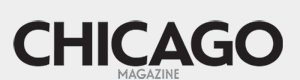

In [97]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
url_base = 'http://www.chicagomag.com'
url_sub = '/Chicago-Magazine/November-2012/Best-Sandwiches-Chicago/'
url = url_base + url_sub
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
print(soup.prettify())

In [100]:
len(soup.find_all('div', class_='sammy'))

50

 50위 순위 중 1위 정보

In [101]:
soup.find_all('div', class_='sammy')[0]

<div class="sammy" style="position: relative;">
<div class="sammyRank">1</div>
<div class="sammyListing"><a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a></div>
</div>

In [105]:
tmp = soup.find_all('div', 'sammy')[0]
tmp.find(class_='sammyRank')
tmp.find(class_ = 'sammyRank').get_text()
# 몇 등인지 표시

'1'

In [108]:
tmp.find(class_ = 'sammyListing').get_text()

'BLT\r\nOld Oak Tap\nRead more '

In [110]:
tmp.find('a')
# a태그 조회

<a href="/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/"><b>BLT</b><br>
Old Oak Tap<br>
<em>Read more</em> </br></br></a>

In [112]:
url_tag = tmp.find('a')

In [113]:
url_tag['href']

'/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/'

첫 번째 가게의 정보 추출 
- 메뉴와 가게 이름 분리

In [119]:
import re
tmp_string = tmp.find(class_='sammyListing').get_text()
tmp_string = re.split(('\n|\r\n'), tmp_string)
print(tmp_string)

['BLT', 'Old Oak Tap', 'Read more ']


In [122]:
from urllib.parse import urljoin

rank = []
main_menu = []
cafe_name=[]
url_addr = []
list_soup = soup.find_all('div', 'sammy')
for item in list_soup:
        rank.append(item.find(class_='sammyRank').get_text())
        
        tmp_string = item.find(class_='sammyListing').get_text()
        tmp_string = re.split(('\n|\r\n'), tmp_string)
        
        main_menu.append(tmp_string[0])
        cafe_name.append(tmp_string[1])
        
        url_addr.append(urljoin(url_base, item.find('a')['href']))

In [123]:
print(url_addr)

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Hendrickx-Belgian-Bread-Crafter-Belgian-Chicken-Curry-Salad/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Acadia-Lobster-Roll/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Birchwood-Kitchen-Smoked-Salmon-Salad/', 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-San

In [124]:
print(rank)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50']


In [126]:
print(main_menu[:5])

['BLT', 'Fried Bologna', 'Woodland Mushroom', 'Roast Beef', 'PB&L']


In [127]:
cafe_name[:5]

['Old Oak Tap', 'Au Cheval', 'Xoco', 'Al’s Deli', 'Publican Quality Meats']

In [128]:
url_addr[:5]

['http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Old-Oak-Tap-BLT/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Au-Cheval-Fried-Bologna/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Xoco-Woodland-Mushroom/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Als-Deli-Roast-Beef/',
 'http://www.chicagomag.com/Chicago-Magazine/November-2012/Best-Sandwiches-in-Chicago-Publican-Quality-Meats-PB-L/']

네이버 영화 평점 사이트 접속하기

In [203]:
# from bs4 import Beautifulsoup
from urllib.request import urlopen
url_base = 'https://movie.naver.com'
url_sub = '/movie/sdb/rank/rmovie.nhn?sel=cur&dat=20180630'
url = url_base+url_sub
page = urlopen(url)
soup=BeautifulSoup(page, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="ko">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
   <meta content="네이버영화 " property="me2:post_tag">
    <meta content="네이버영화" property="me2:category1"/>
    <meta content="" property="me2:category2"/>
    <meta content="랭킹 : 네이버 영화" property="og:title"/>
    <meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
    <meta content="article" property="og:type"/>
    <meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;dat=20180630" property="og:url"/>
    <meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/>
    <!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
    <meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
    <meta 

In [131]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=179518" title="주전장">주전장</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189111" title="두 교황">두 교황</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190244" title="러브 앳">러브 앳</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=183132" title="교회오빠">교회오빠</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=150376" title="나, 다니엘 블레이크">나, 다니엘 블레이크</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=29059" title="피아니스트의 전설">피아니스트의 전설</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=190395" title="눈의 여왕4">눈의 여왕4</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=189000" title="나이브스 아웃">나이브스 아웃</a>
 

In [133]:
soup.find_all('div','tit5')[0].a
# find_all 한 것 중 a태그를 가져오라

<a href="/movie/bi/mi/basic.nhn?code=181710" title="포드 V 페라리">포드 V 페라리</a>

In [134]:
soup.find_all('div','tit5')[0].a.string

'포드 V 페라리'

In [135]:
soup.find_all('div','tit5')[0].a.get_text()

'포드 V 페라리'

In [137]:
soup.find_all('td','point')
# 평점 조회

[<td class="point">9.54</td>,
 <td class="point">9.52</td>,
 <td class="point">9.37</td>,
 <td class="point">9.27</td>,
 <td class="point">9.27</td>,
 <td class="point">9.27</td>,
 <td class="point">9.24</td>,
 <td class="point">9.20</td>,
 <td class="point">9.17</td>,
 <td class="point">9.13</td>,
 <td class="point">9.12</td>,
 <td class="point">9.12</td>,
 <td class="point">9.11</td>,
 <td class="point">9.07</td>,
 <td class="point">9.00</td>,
 <td class="point">8.95</td>,
 <td class="point">8.95</td>,
 <td class="point">8.94</td>,
 <td class="point">8.92</td>,
 <td class="point">8.91</td>,
 <td class="point">8.86</td>,
 <td class="point">8.86</td>,
 <td class="point">8.86</td>,
 <td class="point">8.82</td>,
 <td class="point">8.70</td>,
 <td class="point">8.49</td>,
 <td class="point">8.49</td>,
 <td class="point">8.48</td>,
 <td class="point">8.46</td>,
 <td class="point">8.28</td>,
 <td class="point">8.03</td>,
 <td class="point">7.90</td>,
 <td class="point">7.85</td>,
 <td class

In [138]:
soup.find_all('td','point')[0].string
# find_all 하면 list가 오는데 0번째의 string 가져오기

'9.54'

### 날짜 설정해서 해당 날짜의 영화 제목 & 영화 평점 출력

In [151]:
from urllib.request import urlopen
ur_select = input('원하는 날짜를 입력하시오 (예20080920): ')

원하는 날짜를 입력하시오 (예20080920): 20040505


In [217]:
url_base = 'https://movie.naver.com'
url_sub = f'/movie/sdb/rank/rmovie.nhn?sel=cur&date={ur_select}'
url = url_base+url_sub

page = urlopen(url)
soup=BeautifulSoup(page, 'html.parser')

title = soup.find_all('div','tit5') 
po = (soup.find_all('td','point'))

print(f'입력한 날짜 :{ur_select}','\n')
for i in range(len(title)):
    print('%-2s %-30s %5s' % (str(i+1)+'위',title[i].a.string, po[i].string))

입력한 날짜 :20040505 

1위 말아톤                             9.43
2위 인크레더블                           9.09
3위 조제, 호랑이 그리고 물고기들                9.06
4위 뉴 폴리스 스토리                       8.70
5위 오페라의 유령                         8.38
6위 쿵푸 허슬                           8.10
7위 거미숲                             8.03
8위 공공의 적 2                         7.85
9위 내셔널 트레져                         7.52
10위 빈 집                             7.34
11위 키다리 아저씨                         7.04
12위 귀여워                             4.12
13위 몽정기 2                           3.34


### RSS 스크레이핑
- 업데이트가 자주 일어나는 사이트에서 사용
- XML 기반의 표준
- 간단한 방법으로 RSS 피드에서 데이터를 추출할 수 있도록 해주는 라이브러리

In [219]:
import feedparser

In [243]:
url = 'http://aladin.co.kr/rss/new_all/351'
d = feedparser.parse(url)  # dic 형태로 불러온다
# print(d)
d.find_all('a',)

{'feed': {'title': '분야별 신간 - 컴퓨터/모바일', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': '분야별 신간 - 컴퓨터/모바일'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'http://www.aladin.co.kr/rsscenter/go.aspx/www.aladin.co.kr/shop/book/wnewbook.aspx?cid=351&rssType=2&type=title'}], 'link': 'http://www.aladin.co.kr/rsscenter/go.aspx/www.aladin.co.kr/shop/book/wnewbook.aspx?cid=351&rssType=2&type=title', 'language': 'ko-kr', 'subtitle': '분야별 신간', 'subtitle_detail': {'type': 'text/html', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': '분야별 신간'}, 'rights': 'Copyright 1999 - 2020 Aladdin communications Inc. Corporation All Rights Reserved.', 'rights_detail': {'type': 'text/plain', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': 'Copyright 1999 - 2020 Aladdin communications Inc. Corporation All Rights Reserved.'}, 'generator_detail': {'name': 'Aladdin RSS(Alss) v0.9'}, 'gene

In [222]:
print(d.feed)

{'title': '분야별 신간 - 컴퓨터/모바일', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': '분야별 신간 - 컴퓨터/모바일'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'http://www.aladin.co.kr/rsscenter/go.aspx/www.aladin.co.kr/shop/book/wnewbook.aspx?cid=351&rssType=2&type=title'}], 'link': 'http://www.aladin.co.kr/rsscenter/go.aspx/www.aladin.co.kr/shop/book/wnewbook.aspx?cid=351&rssType=2&type=title', 'language': 'ko-kr', 'subtitle': '분야별 신간', 'subtitle_detail': {'type': 'text/html', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': '분야별 신간'}, 'rights': 'Copyright 1999 - 2020 Aladdin communications Inc. Corporation All Rights Reserved.', 'rights_detail': {'type': 'text/plain', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': 'Copyright 1999 - 2020 Aladdin communications Inc. Corporation All Rights Reserved.'}, 'generator_detail': {'name': 'Aladdin RSS(Alss) v0.9'}, 'generator': '

In [229]:
print(d.feed.title)

분야별 신간 - 컴퓨터/모바일


In [224]:
print(d['feed']['title'])

분야별 신간 - 컴퓨터/모바일


In [230]:
print(d['feed']['description'])

분야별 신간


In [246]:
print(d.entries[0])

{'authors': [{'name': '알라딘', 'email': 'noSpam.rss@aladdin.co.kr'}], 'author': '알라딘 <noSpam.rss@aladdin.co.kr>', 'author_detail': {'name': '알라딘', 'email': 'noSpam.rss@aladdin.co.kr'}, 'tags': [{'term': '국내도서>컴퓨터/모바일>그래픽/멀티미디어>그래픽 일반', 'scheme': None, 'label': None}], 'title': '3D프린팅 수업을 위한 틴커캐드 디자인 4/고성민.이송하 지음/메카피아', 'title_detail': {'type': 'text/plain', 'language': None, 'base': 'http://aladin.co.kr/rss/new_all/351', 'value': '3D프린팅 수업을 위한 틴커캐드 디자인 4/고성민.이송하 지음/메카피아'}, 'links': [{'rel': 'alternate', 'type': 'text/html', 'href': 'http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226930190'}], 'link': 'http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226930190', 'published': 'Fri, 10 Jan 2020 09:36:00 +0900', 'published_parsed': time.struct_time(tm_year=2020, tm_mon=1, tm_mday=10, tm_hour=0, tm_min=36, tm_sec=0, tm_wday=4, tm_yday=10, tm_isdst=0), 'id': 'http://www.aladin.co.kr/shop/wproduct.aspx?itemID=226930190', 'guidislink': False, 'summary': 

In [231]:
d.entries[10].title

'파이썬 네트워크 프로그래밍/서열규.전희성 지음/복두출판사'

In [232]:
d.entries[0].updated

'Fri, 10 Jan 2020 09:36:00 +0900'

In [234]:
d.entries[0].updated_parsed # 구조체형식으로 보면

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=10, tm_hour=0, tm_min=36, tm_sec=0, tm_wday=4, tm_yday=10, tm_isdst=0)

In [235]:
d.entries[0].updated_parsed.tm_year

2020

### 'http://www.aladin.co.kr/rww/new_all/351'
- 웹 페이지에서 도서 제목과 링크 url 출력

In [241]:
url = 'http://aladin.co.kr/rss/new_all/351'
d = feedparser.parse(url)  # dic 형태로 불러온다
print(d.feed.title)

분야별 신간 - 컴퓨터/모바일


In [244]:
for entry in d.entries:
    print('제목: ', entry.title)
    print('url : ', entry.link)

제목:  3D프린팅 수업을 위한 틴커캐드 디자인 4/고성민.이송하 지음/메카피아
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226930190
제목:  인공지능 함수 OCaml 프로그래밍/John Whitington 지음, 배재학 옮김/한티미디어
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226953610
제목:  파이썬 프로그래밍/김영탁 지음/홍릉과학출판사
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226624065
제목:  하이퍼레저 프로젝트 완전정복/쉰 (브라이언) 우 외 지음, 김승현 옮김/홍릉과학출판사
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226630806
제목:  따라하기로 배우는 Excel 기초실무/강형일.정행섭.조윤기 지음/복두출판사
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226643141
제목:  [POD] 그님티? ㄴㄴ 유니티!/김광용.김용주.박세진 지음/부크크(bookk)
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226682236
제목:  PHP Express/신윤환 지음/생능출판사
url :  http://www.aladin.co.kr/rsscenter/go.aspx?rssType=2&type=item&itemId=226748026
제목:  스크래치와 마이크로비트로 배우는 사고력 코딩/씨마스 에듀 코딩 교육 연구회 지음/씨마스
url :  http://www.aladin.co.kr/

### 다음과 같이 공시정보를 출력하는 프로그램을 작성

http://dart.fss.or.kr/api/companyRSS.xml?crpCd=

In [308]:
while 1:
    cpn_num = int(input('회사 번호를 선택하시오 : '))
    if cpn_num >= 1 and cpn_num <= 5 :
        break
        
if cpn_num == 1:
    num = '00126380'
elif cpn_num == 2:
    num = '00401731'
elif cpn_num == 3:
    num = '00159023'
elif cpn_num == 4:
    num = '00266961'
else: num = '00258801'
    
url = f'http://dart.fss.or.kr/api/companyRSS.xml?crpCd={num}'
d = feedparser.parse(url)  # dic 형태로 불러온다
# print(d)
# print(d.feed.link)

# print(d.entries)


for i in d.entries:
    print(i.title)
    print(i.link)

회사 번호를 선택하시오 : 5


### 데이터베이스에 저장하기

In [310]:
import sqlite3

In [311]:
con = sqlite3.connect('C:/sqlite/testDB')

In [312]:
cur = con.cursor()

In [313]:
cur.execute('create table testTable01(id text, name text, email text, birthYear int)')

In [316]:
cur.execute("insert into testTable01 values('John','John Park','gmail', 1993)")

In [317]:
cur.executemany("insert into testTable01 values(:id, :name, :email, :birthYear)",
               [{'id':'Sam', 'name':'Sam Kim','email':'naver','birthYear':1995},
               {'id':'Kate', 'name':'Kate Shin','email':'yahoo','birthYear':1999},
               {'id':'Pual', 'name':'Pual Kim','email':'daum','birthYear':2000}])

In [327]:
con.commit()

In [328]:
con.close()

In [329]:
con = sqlite3.connect('C:/sqlite/testDB')
cur = con.cursor()

In [330]:
cur.execute('select * from testTable01')

In [331]:
while True:
    row = cur.fetchone()
    if row == None:
        break
    data1 = row[0]
    data2 = row[1]
    data3 = row[2]
    data4 = row[3]
    print(data1, '|', data2, '|', data3, '|', data4)

John | John Park | gmail | 1993
Sam | Sam Kim | naver | 1995
Kate | Kate Shin | yahoo | 1999
Pual | Pual Kim | daum | 2000


In [338]:
cur.execute('create table productTable01(p_code text, p_name text, p_price int, p_amount int)')

OperationalError: table productTable01 already exists

In [340]:
cur.executemany("insert into productTable01 values(:p_code, :p_name, :p_price, :p_amount)",[
    {'p_code':'p001', 'p_name':'notebook', 'p_price':110, 'p_amount':5},
    {'p_code':'p002', 'p_name':'cake', 'p_price':3, 'p_amount':22},
    {'p_code':'p003', 'p_name':'key', 'p_price':2, 'p_amount':11}
])

In [350]:
cur.execute('select * from productTable01')

In [343]:
while True:
    row = cur.fetchone()
    if row == None:
        break
    data1 = row[0]
    data2 = row[1]
    data3 = row[2]
    data4 = row[3]
    print(data1, '|', data2, '|', data3, '|', data4)

p001 | notebook | 110 | 5
p002 | cake | 3 | 22
p003 | key | 2 | 11
